In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Чё по данным
mean_demand = 2500  # Средний спрос 
std_dev = 500  # Стандартное отклонение спроса
pr = 50  # Цена
cost = 30  # Себестоимость
discount_pr = 15  # Цена уценки 

In [2]:
# Расчитаем прибыть
def profit(demand, order):
    sold = min(demand, order)
    revenue = sold * pr
    cost_of_goods_sold = order * cost
    discount_revenue = (order - sold) * discount_pr
    return revenue - cost_of_goods_sold + discount_revenue

In [3]:
# Генерим спрос (вот тут прям неуверенна насколько я правильно это сделала в принципе)
log_std_dev = np.sqrt(np.log(1 + (std_dev / mean_demand)**2))
demands = lognorm.rvs(s=log_std_dev, scale=mean_demand, size=10000)

In [4]:
# Расчет прибыли для различных объемов заказа
order_quantities = np.arange(1500, 3500, 50)
profits = np.zeros_like(order_quantities)
for i, order in enumerate(order_quantities):
    # Проходим по каждому значению спроса в массиве demands
    single_profits = []
    for demand in demands:
        single_profits.append(profit(demand, order))
    # Рассчитываем среднюю прибыль для данного объема заказа
    profits[i] = np.mean(single_profits)
# С этого я вообще охерела столько сидеть :(  и всё равно сомневаюсь

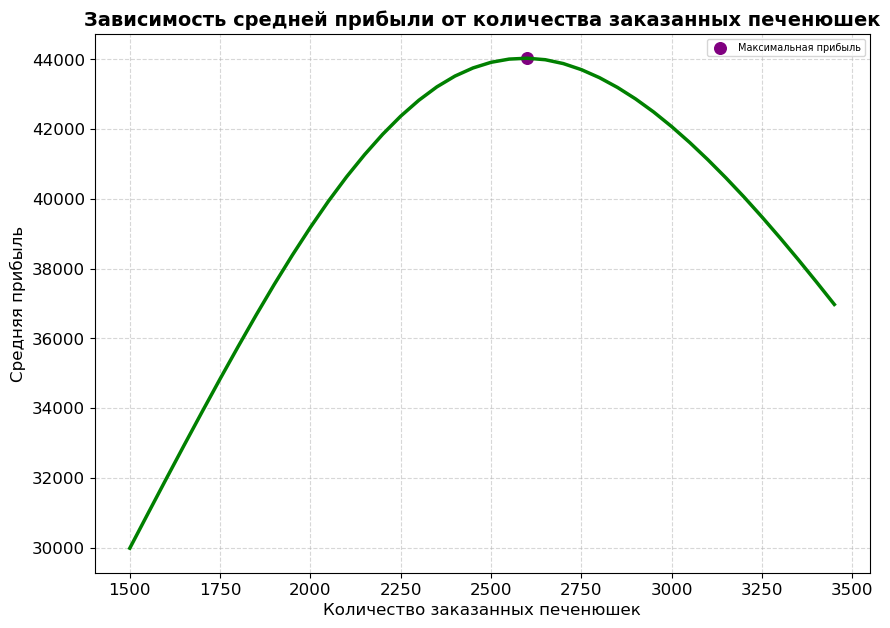

In [5]:
# Визуализашка
plt.figure(figsize=(10, 7)) 
plt.plot(order_quantities, profits, linewidth=2.5, color='green') 
plt.xlabel('Количество заказанных печенюшек', fontsize=12) 
plt.ylabel('Средняя прибыль', fontsize=12) 
plt.title('Зависимость средней прибыли от количества заказанных печенюшек', fontsize=14, fontweight='bold') 
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# Находим точку мах прибыли
max_profit_index = np.argmax(profits)
max_profit_quantity = order_quantities[max_profit_index]
max_profit = profits[max_profit_index]

# Точка мах прибыли
plt.scatter(max_profit_quantity, max_profit, s=70, marker='o', color='purple', label='Максимальная прибыль')
plt.legend(fontsize=7) 
plt.show()

# Это мне понравилось делать)))))

In [6]:
# Определение оптимального заказа
optimal_order_quantity = order_quantities[np.argmax(profits)]

print(f'Оптимальное количество печенюшек для заказа: {optimal_order_quantity} упаковок')



Оптимальное количество печенюшек для заказа: 2600 упаковок


In [7]:
# Расчет средней и медианной прибыли, если заказ оптимальный
optimal_profits = []
for demand in demands:
    optimal_profits.append(profit(demand, optimal_order_quantity)) 

mean_profit = np.mean(optimal_profits)
median_profit = np.median(optimal_profits)

print(f'Средняя прибыль при оптимальном заказе: {mean_profit:.2f} рублей')
print(f'Медианная прибыль при оптимальном заказе: {median_profit:.2f} рублей')

Средняя прибыль при оптимальном заказе: 44036.62 рублей
Медианная прибыль при оптимальном заказе: 48505.46 рублей


In [8]:
# Расчет потерь (от избытка и недостатка печений)
lost_from_izbit = (optimal_order_quantity - demands) * (cost - discount_pr)
lost_from_nedost = (demands - optimal_order_quantity) * (pr - cost)
lost_from_izbit = lost_from_izbit[lost_from_izbit > 0]
lost_from_nedost = lost_from_nedost[lost_from_nedost > 0]

mean_lost_from_izbit = np.mean(lost_from_izbit)
mean_lost_from_nedost = np.mean(lost_from_nedost)

print(f'Средняя потеря от избытка печений: {mean_lost_from_izbit:.2f} рублей')
print(f'Средняя потеря от недостатка печений: {mean_lost_from_nedost:.2f} рублей')



Средняя потеря от избытка печений: 5909.75 рублей
Средняя потеря от недостатка печений: 8449.68 рублей


In [9]:
# Тут зададим новое отклонение
std_dev = 1000 
log_std_dev = np.sqrt(np.log(1 + (std_dev / mean_demand)**2))
demands = lognorm.rvs(s=log_std_dev, scale=mean_demand, size=10000)

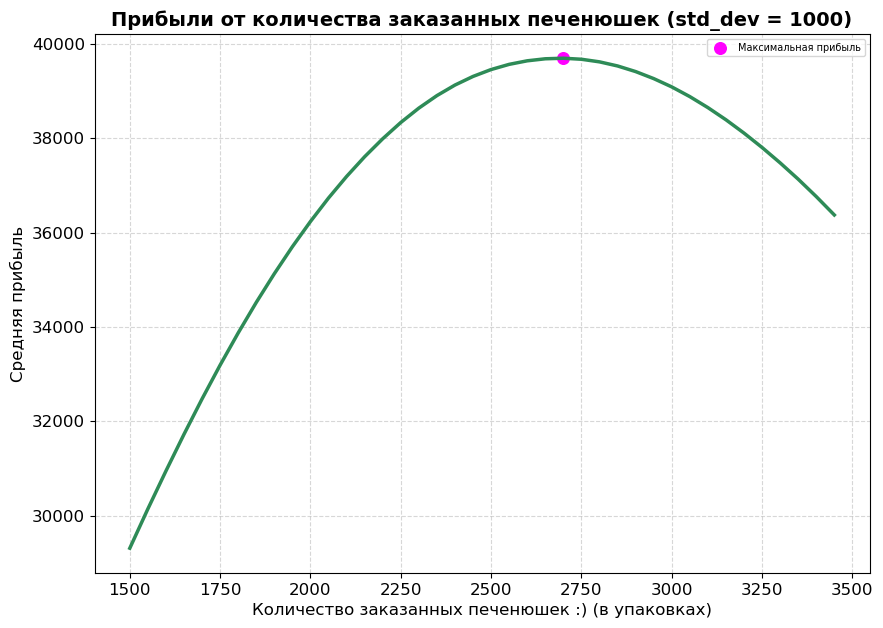

In [10]:
# Опять расчёт прибыли для разных объёмов
order_quantities = np.arange(1500, 3500, 50)
profits = np.zeros_like(order_quantities)
for i, order in enumerate(order_quantities):
    single_profits = []
    for demand in demands:
        single_profits.append(profit(demand, order))
    profits[i] = np.mean(single_profits)

# Визуализашка
plt.figure(figsize=(10, 7)) 
plt.plot(order_quantities, profits, linewidth=2.5, color='seagreen') 
plt.xlabel('Количество заказанных печенюшек :) (в упаковках)', fontsize=12) 
plt.ylabel('Средняя прибыль', fontsize=12) 
plt.title('Прибыли от количества заказанных печенюшек (std_dev = 1000)', fontsize=14, fontweight='bold') 
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# Находим точку мах прибыли
max_profit_index = np.argmax(profits)
max_profit_quantity = order_quantities[max_profit_index]
max_profit = profits[max_profit_index]

# Точка мах прибыли
plt.scatter(max_profit_quantity, max_profit, s=70, marker='o', color='fuchsia', label='Максимальная прибыль')
plt.legend(fontsize=7) 
plt.show()

In [11]:
# Определение оптимального заказа
optimal_order_quantity = order_quantities[np.argmax(profits)]

print(f'Оптимальное количество печений для заказа (std_dev = 1000): {optimal_order_quantity} упаковок')

Оптимальное количество печений для заказа (std_dev = 1000): 2700 упаковок


In [12]:
# Расчет средней и медианной прибыли при оптимальном заказе
optimal_profits = []
for demand in demands:
    optimal_profits.append(profit(demand, optimal_order_quantity)) 

mean_profit = np.mean(optimal_profits)
median_profit = np.median(optimal_profits)

print(f'Средняя прибыль при оптимальном заказе (std_dev = 1000): {mean_profit:.2f} рублей')
print(f'Медианная прибыль при оптимальном заказе (std_dev = 1000): {median_profit:.2f} рублей')

Средняя прибыль при оптимальном заказе (std_dev = 1000): 39698.18 рублей
Медианная прибыль при оптимальном заказе (std_dev = 1000): 47108.40 рублей


In [13]:
# Расчет потерь от избытка и недостатка печений
lost_from_izbit = (optimal_order_quantity - demands) * (cost - discount_pr)
lost_from_nedost = (demands - optimal_order_quantity) * (pr - cost)
lost_from_izbit = lost_from_izbit[lost_from_izbit > 0]
lost_from_nedost = lost_from_nedost[lost_from_nedost > 0]

mean_lost_from_izbit = np.mean(lost_from_izbit)
mean_lost_from_nedost = np.mean(lost_from_nedost)

print(f'Средняя потеря от избытка печений (std_dev = 1000): {mean_lost_from_izbit:.2f} рублей')
print(f'Средняя потеря от недостатка печений (std_dev = 1000): {mean_lost_from_nedost:.2f} рублей')

Средняя потеря от избытка печений (std_dev = 1000): 10695.08 рублей
Средняя потеря от недостатка печений (std_dev = 1000): 19065.07 рублей
